In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression # explicit class import from module
from sklearn.linear_model import LogisticRegression # explicit class import from module
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsClassifier #we know where this object comes from
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm, metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc


from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore') # Code for stopping warnings (deprecation warning, etc.)
pd.set_option('display.max_columns', None) # Code for showin g all columns in the dateset, withoud '...' in between.

In [55]:
people = pd.read_csv("../raw_data/people_train.csv")
people.head()

,employee_id,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,business_travel_Non-Travel,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_field_Human Resources,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,job_role_Healthcare Representative,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Divorced,marital_status_Married,marital_status_Single
0,456,-0.500000,0,-0.340456,-0.166667,3,4,1,-0.972222,2,2,3,0.240007,-0.694698,-0.333333,0,-0.166667,3,3,3,0.111111,-1.0,3,0.833333,1.2,0.000000,-0.2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,485,-0.250000,1,-0.653846,-0.166667,3,4,1,-0.861111,3,1,3,-0.359003,-0.394561,-0.333333,1,-0.166667,3,2,0,-0.888889,-1.0,3,-0.666667,-0.6,-0.333333,-0.6,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1049,0.750000,0,-0.029915,1.416667,4,2,0,-0.805556,3,1,2,-0.482582,-0.461706,-0.333333,0,0.333333,3,1,0,-0.333333,0.0,3,0.166667,0.0,-0.333333,0.2,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1102,-0.666667,0,0.122507,0.666667,2,1,0,-0.416667,3,1,3,-0.477081,0.681382,-0.333333,0,0.333333,3,4,1,-0.555556,2.0,2,-0.166667,-0.2,0.333333,-0.2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,806,-0.500000,0,0.159544,-0.500000,3,4,0,-0.750000,1,1,3,-0.178951,0.834154,0.333333,0,1.166667,4,3,2,-0.222222,-1.0,3,-0.500000,-0.2,-0.333333,-0.2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [56]:
people['attrition'].value_counts()

0    862
1    167
Name: attrition, dtype: int64

In [57]:
X = people.drop(columns = 'attrition')
y = people['attrition']

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 0)

In [59]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

In [60]:
from collections import Counter
print('before SMOTE :' , Counter(y_train))
print('after SMOTE :' , Counter(y_train_smote))

before SMOTE : Counter({0: 646, 1: 125})
after SMOTE : Counter({0: 646, 1: 646})


In [61]:
#sem smote
model = RandomForestClassifier(n_estimators=100)
sacc = cross_val_score(model, X_train, y_train, scoring='accuracy')
sf1 = cross_val_score(model, X_train, y_train, scoring='f1')
sre = cross_val_score(model, X_train, y_train, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.8547297863426895
f1:  0.21877131489200452
recall:  0.12


# Random Forest Classifier

In [62]:
model = RandomForestClassifier(n_estimators=115)

In [66]:
model = RandomForestClassifier(n_estimators=107)
sacc = cross_val_score(model, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(model, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(model, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.9080482475831314
f1:  0.8748207237750224
recall:  0.8527251043530114


In [67]:
model.fit(X_train_smote,y_train_smote)

RandomForestClassifier(n_estimators=107)

In [68]:
y_predFR = model.predict(X_val)

In [69]:
print(classification_report(y_val, y_predFR))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       216
           1       0.65      0.31      0.42        42

    accuracy                           0.86       258
   macro avg       0.76      0.64      0.67       258
weighted avg       0.84      0.86      0.84       258



In [73]:
#testando treshold
threshold = 0.28
predicted_proba = model.predict_proba(X_val)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
accuracy = accuracy_score(y_val, predicted)
print(accuracy)
print(classification_report(y_val, predicted))

0.6821705426356589
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       216
           1       0.29      0.64      0.40        42

    accuracy                           0.68       258
   macro avg       0.60      0.67      0.59       258
weighted avg       0.81      0.68      0.72       258



In [74]:
y_predrandf = model.predict(X_val)

In [75]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = model.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    print(threshold, classification_report(y_val, predicted))

0.0               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.16      1.00      0.28        42

    accuracy                           0.16       258
   macro avg       0.08      0.50      0.14       258
weighted avg       0.03      0.16      0.05       258

0.01               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.16      1.00      0.28        42

    accuracy                           0.16       258
   macro avg       0.08      0.50      0.14       258
weighted avg       0.03      0.16      0.05       258

0.02               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.16      1.00      0.28        42

    accuracy                           0.16       258
   macro avg       0.08      0.50      0.14       258
weighted avg       0.03      0.16      0.05       258

0.03 

0.26               precision    recall  f1-score   support

           0       0.92      0.65      0.76       216
           1       0.28      0.69      0.40        42

    accuracy                           0.66       258
   macro avg       0.60      0.67      0.58       258
weighted avg       0.81      0.66      0.70       258

0.27               precision    recall  f1-score   support

           0       0.91      0.68      0.78       216
           1       0.29      0.67      0.40        42

    accuracy                           0.67       258
   macro avg       0.60      0.67      0.59       258
weighted avg       0.81      0.67      0.72       258

0.28               precision    recall  f1-score   support

           0       0.91      0.69      0.78       216
           1       0.29      0.64      0.40        42

    accuracy                           0.68       258
   macro avg       0.60      0.67      0.59       258
weighted avg       0.81      0.68      0.72       258

0.29

0.52               precision    recall  f1-score   support

           0       0.87      0.97      0.91       216
           1       0.59      0.24      0.34        42

    accuracy                           0.85       258
   macro avg       0.73      0.60      0.63       258
weighted avg       0.82      0.85      0.82       258

0.53               precision    recall  f1-score   support

           0       0.86      0.97      0.91       216
           1       0.53      0.19      0.28        42

    accuracy                           0.84       258
   macro avg       0.70      0.58      0.60       258
weighted avg       0.81      0.84      0.81       258

0.54               precision    recall  f1-score   support

           0       0.86      0.98      0.92       216
           1       0.67      0.19      0.30        42

    accuracy                           0.85       258
   macro avg       0.76      0.59      0.61       258
weighted avg       0.83      0.85      0.82       258

0.55

0.78               precision    recall  f1-score   support

           0       0.84      1.00      0.91       216
           1       0.00      0.00      0.00        42

    accuracy                           0.84       258
   macro avg       0.42      0.50      0.46       258
weighted avg       0.70      0.84      0.76       258

0.79               precision    recall  f1-score   support

           0       0.84      1.00      0.91       216
           1       0.00      0.00      0.00        42

    accuracy                           0.84       258
   macro avg       0.42      0.50      0.46       258
weighted avg       0.70      0.84      0.76       258

0.8               precision    recall  f1-score   support

           0       0.84      1.00      0.91       216
           1       0.00      0.00      0.00        42

    accuracy                           0.84       258
   macro avg       0.42      0.50      0.46       258
weighted avg       0.70      0.84      0.76       258

0.81 

In [ ]:
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [2,5]
bootstrap = [True, False]

In [ ]:
grid = {'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

In [142]:
rGRID = GridSearchCV(model, param_grid = grid, scoring = 'recall', verbose = 1)
rGRID.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [17]:
rGRID.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [18]:
rGRID.best_estimator_.score(X_val,y_val)

0.7713178294573644

In [19]:
y_pred = rGRID.best_estimator_.predict(X_val)

In [76]:
print(classification_report(y_pred, y_val))

ValueError: Found input variables with inconsistent numbers of samples: [276, 258]

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rGRID.best_estimator_ , X_val, y_val)
plt.show()

NameError: name 'rGRID' is not defined

In [22]:
21/(21+26)

0.44680851063829785

In [23]:
rGRID.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=5, n_estimators=115)

In [24]:
rGRID.best_estimator_.score(X_val, y_val)

0.7713178294573644

# logistic regression

In [27]:
lgmodel = LogisticRegression(random_state=0)
lgmodel.fit(X_train_smote, y_train_smote)
sacc = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.6790577305905773
f1:  0.6701972991501963
recall:  0.6520469692161218


In [28]:
y_predlog = lgmodel.predict(X_val)

In [29]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = lgmodel.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    print(threshold, classification_report(y_val, predicted))

0.0               precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.14      1.00      0.25        40

    accuracy                           0.14       276
   macro avg       0.07      0.50      0.13       276
weighted avg       0.02      0.14      0.04       276

0.01               precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.14      1.00      0.25        40

    accuracy                           0.14       276
   macro avg       0.07      0.50      0.13       276
weighted avg       0.02      0.14      0.04       276

0.02               precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.14      1.00      0.25        40

    accuracy                           0.14       276
   macro avg       0.07      0.50      0.13       276
weighted avg       0.02      0.14      0.04       276

0.03 

0.28               precision    recall  f1-score   support

           0       0.93      0.34      0.50       236
           1       0.18      0.85      0.30        40

    accuracy                           0.42       276
   macro avg       0.56      0.60      0.40       276
weighted avg       0.82      0.42      0.47       276

0.29               precision    recall  f1-score   support

           0       0.93      0.35      0.51       236
           1       0.18      0.85      0.30        40

    accuracy                           0.42       276
   macro avg       0.56      0.60      0.41       276
weighted avg       0.82      0.42      0.48       276

0.3               precision    recall  f1-score   support

           0       0.91      0.36      0.51       236
           1       0.17      0.80      0.29        40

    accuracy                           0.42       276
   macro avg       0.54      0.58      0.40       276
weighted avg       0.81      0.42      0.48       276

0.31 

0.54               precision    recall  f1-score   support

           0       0.91      0.78      0.84       236
           1       0.30      0.55      0.39        40

    accuracy                           0.75       276
   macro avg       0.60      0.66      0.61       276
weighted avg       0.82      0.75      0.77       276

0.55               precision    recall  f1-score   support

           0       0.91      0.80      0.85       236
           1       0.32      0.55      0.40        40

    accuracy                           0.76       276
   macro avg       0.62      0.68      0.63       276
weighted avg       0.83      0.76      0.79       276

0.56               precision    recall  f1-score   support

           0       0.91      0.82      0.86       236
           1       0.33      0.53      0.40        40

    accuracy                           0.78       276
   macro avg       0.62      0.67      0.63       276
weighted avg       0.83      0.78      0.80       276

0.57

0.86               precision    recall  f1-score   support

           0       0.86      0.99      0.92       236
           1       0.40      0.05      0.09        40

    accuracy                           0.85       276
   macro avg       0.63      0.52      0.50       276
weighted avg       0.79      0.85      0.80       276

0.87               precision    recall  f1-score   support

           0       0.86      1.00      0.92       236
           1       0.67      0.05      0.09        40

    accuracy                           0.86       276
   macro avg       0.76      0.52      0.51       276
weighted avg       0.83      0.86      0.80       276

0.88               precision    recall  f1-score   support

           0       0.86      1.00      0.92       236
           1       0.67      0.05      0.09        40

    accuracy                           0.86       276
   macro avg       0.76      0.52      0.51       276
weighted avg       0.83      0.86      0.80       276

0.89

In [30]:
loggrid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
          'C': np.logspace(-4, 4, 20),
          'solver' : ['lbfgs', 'newton-cg' , 'liblinear', 'sag', 'saga']}
         # 'max_iter': [100, 1000, 2500, 5000]}

In [31]:
clf = GridSearchCV(lgmodel, param_grid = loggrid, cv = 3, verbose = True, n_jobs=-1)

In [32]:
best_clf = clf.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 626 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.9min finished


In [33]:
best_clf.best_estimator_.score(X_val, y_val)

0.7644927536231884

In [34]:
best_clf.best_params_

{'C': 0.08858667904100823, 'penalty': 'l2', 'solver': 'newton-cg'}

In [35]:
y_pred2 = best_clf.best_estimator_.predict(X_val)

In [36]:
best_clf.score(X_val, y_val)

0.7644927536231884

In [37]:
print(classification_report(y_pred2, y_val))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       209
           1       0.53      0.31      0.39        67

    accuracy                           0.76       276
   macro avg       0.67      0.61      0.62       276
weighted avg       0.74      0.76      0.74       276



In [38]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = best_clf.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    print(threshold, classification_report(y_val, predicted))

0.0               precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.14      1.00      0.25        40

    accuracy                           0.14       276
   macro avg       0.07      0.50      0.13       276
weighted avg       0.02      0.14      0.04       276

0.01               precision    recall  f1-score   support

           0       1.00      0.03      0.05       236
           1       0.15      1.00      0.26        40

    accuracy                           0.17       276
   macro avg       0.57      0.51      0.15       276
weighted avg       0.88      0.17      0.08       276

0.02               precision    recall  f1-score   support

           0       0.93      0.06      0.11       236
           1       0.15      0.97      0.26        40

    accuracy                           0.19       276
   macro avg       0.54      0.52      0.19       276
weighted avg       0.82      0.19      0.13       276

0.03 

0.25               precision    recall  f1-score   support

           0       0.94      0.55      0.69       236
           1       0.23      0.80      0.36        40

    accuracy                           0.58       276
   macro avg       0.59      0.67      0.52       276
weighted avg       0.84      0.58      0.64       276

0.26               precision    recall  f1-score   support

           0       0.94      0.57      0.71       236
           1       0.24      0.80      0.37        40

    accuracy                           0.60       276
   macro avg       0.59      0.68      0.54       276
weighted avg       0.84      0.60      0.66       276

0.27               precision    recall  f1-score   support

           0       0.94      0.57      0.71       236
           1       0.23      0.78      0.36        40

    accuracy                           0.60       276
   macro avg       0.59      0.67      0.54       276
weighted avg       0.84      0.60      0.66       276

0.28

0.63               precision    recall  f1-score   support

           0       0.89      0.89      0.89       236
           1       0.37      0.38      0.37        40

    accuracy                           0.82       276
   macro avg       0.63      0.63      0.63       276
weighted avg       0.82      0.82      0.82       276

0.64               precision    recall  f1-score   support

           0       0.89      0.89      0.89       236
           1       0.37      0.38      0.37        40

    accuracy                           0.82       276
   macro avg       0.63      0.63      0.63       276
weighted avg       0.82      0.82      0.82       276

0.65               precision    recall  f1-score   support

           0       0.89      0.89      0.89       236
           1       0.38      0.38      0.38        40

    accuracy                           0.82       276
   macro avg       0.63      0.63      0.63       276
weighted avg       0.82      0.82      0.82       276

0.66

0.93               precision    recall  f1-score   support

           0       0.87      1.00      0.93       236
           1       1.00      0.10      0.18        40

    accuracy                           0.87       276
   macro avg       0.93      0.55      0.56       276
weighted avg       0.89      0.87      0.82       276

0.9400000000000001               precision    recall  f1-score   support

           0       0.86      1.00      0.93       236
           1       1.00      0.05      0.10        40

    accuracy                           0.86       276
   macro avg       0.93      0.53      0.51       276
weighted avg       0.88      0.86      0.81       276

0.9500000000000001               precision    recall  f1-score   support

           0       0.86      1.00      0.92       236
           1       1.00      0.03      0.05        40

    accuracy                           0.86       276
   macro avg       0.93      0.51      0.49       276
weighted avg       0.88      0.

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_val))
print('acc is',metrics.accuracy_score(y_pred, y_val))
print('f1 score is',metrics.f1_score(y_pred, y_val))
print('recall score is',metrics.recall_score(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       195
           1       0.55      0.37      0.44        63

    accuracy                           0.77       258
   macro avg       0.68      0.63      0.65       258
weighted avg       0.75      0.77      0.75       258

acc is 0.7713178294573644
f1 score is 0.43809523809523804
recall score is 0.36507936507936506


In [41]:
from sklearn.metrics import plot_confusion_matrix


In [45]:
X_val

,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_satisfaction,monthly_rate,num_companies_worked,over_time,relationship_satisfaction,stock_option_level,training_times_last_year,years_in_current_role,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
568,1,1450,15,2,4,52,2,10849,5,0,1,1,2,2,3,1,0,1,763.240000,414.804348,1,1
615,1,549,8,4,4,75,4,9278,9,0,1,2,3,9,8,1,0,0,308.083333,82.155556,0,1
478,1,117,13,4,2,73,4,9250,2,0,3,1,3,2,3,1,1,1,550.375000,137.593750,1,1
484,1,410,28,3,4,39,1,16586,4,1,2,1,3,2,0,0,0,1,542.700000,217.080000,1,1
940,1,890,2,4,3,46,3,16374,6,0,4,0,3,2,1,0,0,1,876.400000,156.500000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2,319,4,4,1,41,4,2539,4,0,3,1,2,8,8,0,0,0,214.846154,75.486486,0,1
443,1,833,1,3,3,96,4,23231,1,0,2,0,0,0,0,0,0,1,2723.000000,53.392157,1,1
711,1,408,9,4,3,42,2,7551,0,1,4,0,5,2,2,1,0,1,885.666667,85.709677,0,1
54,1,1376,1,2,2,91,1,2326,9,0,4,1,1,6,6,0,1,0,436.750000,238.227273,0,1


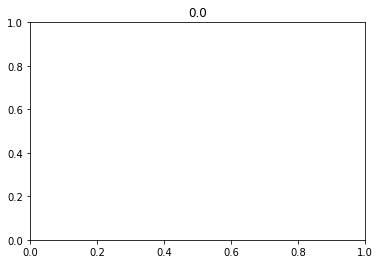

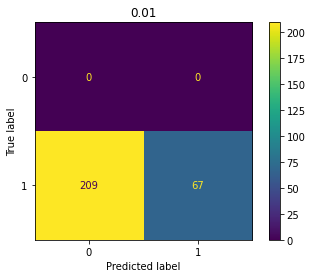

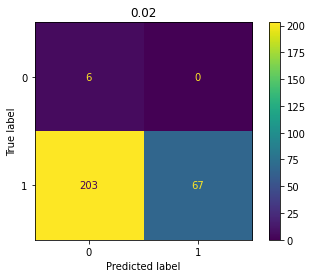

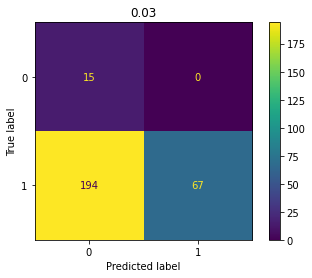

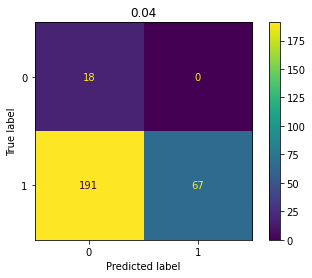

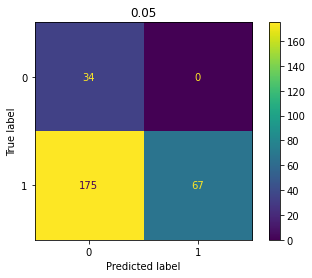

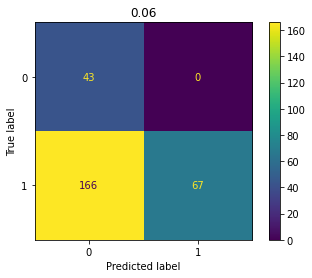

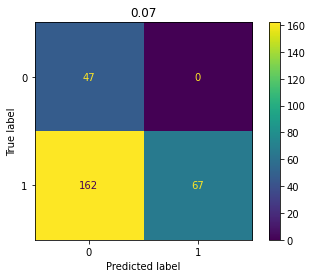

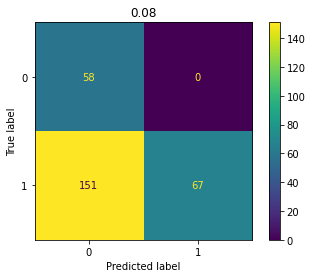

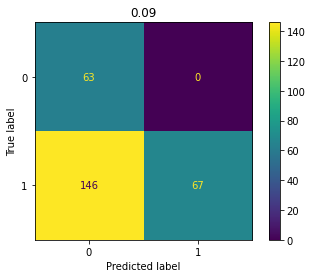

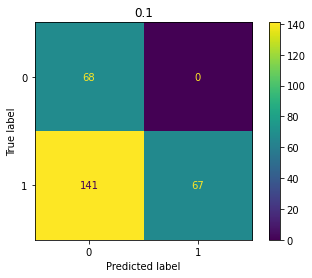

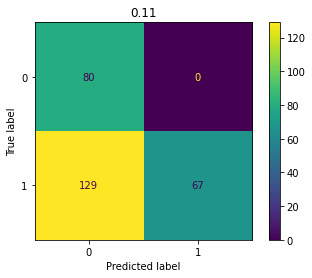

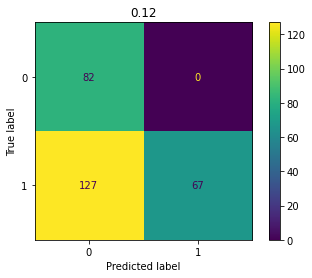

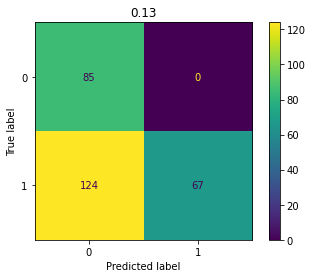

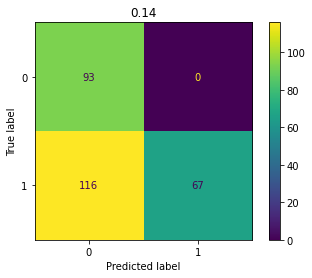

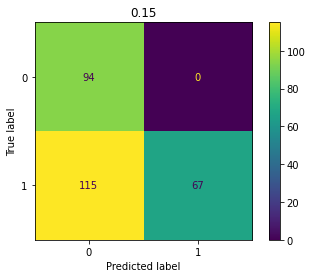

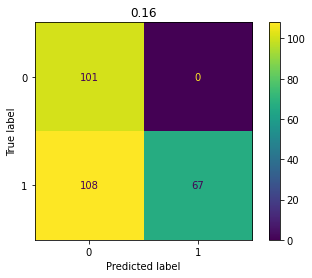

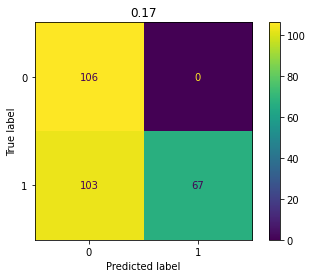

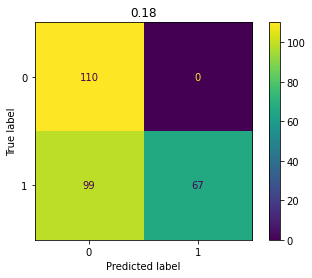

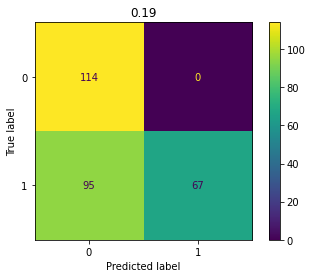

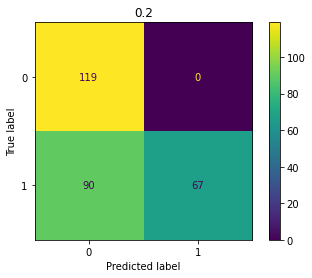

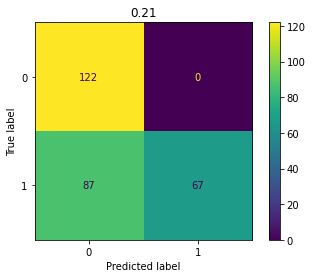

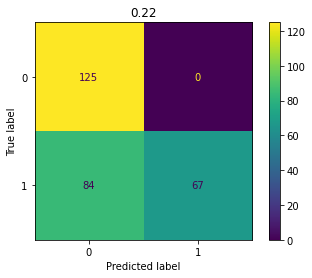

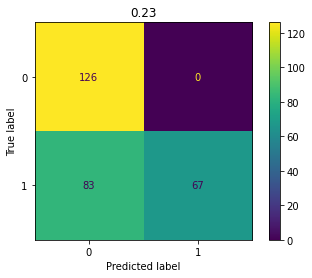

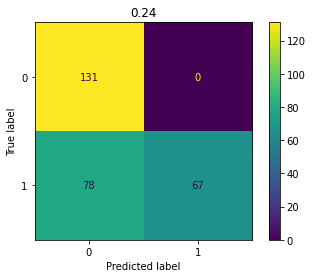

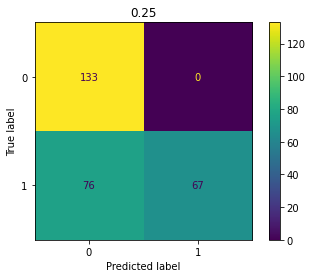

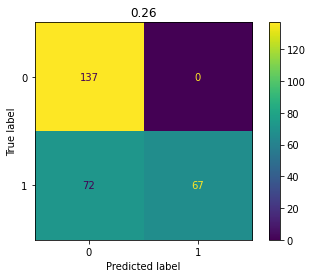

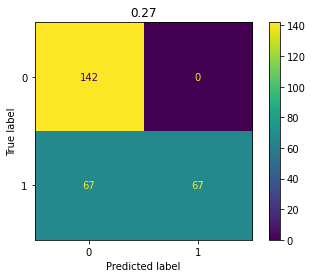

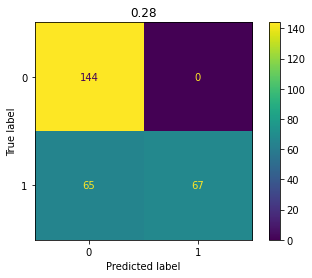

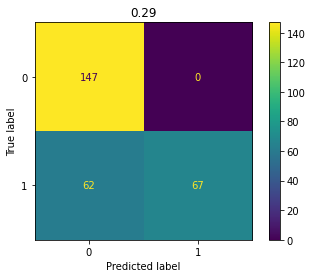

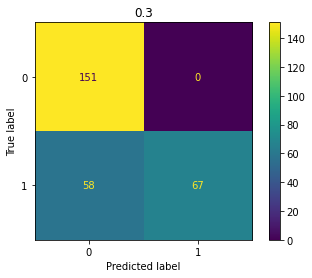

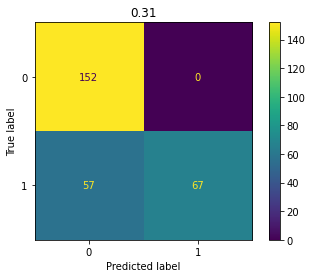

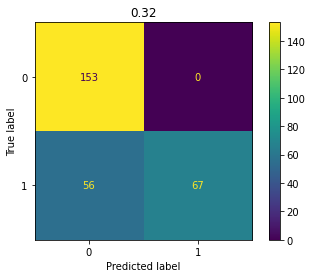

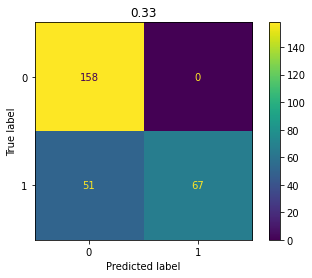

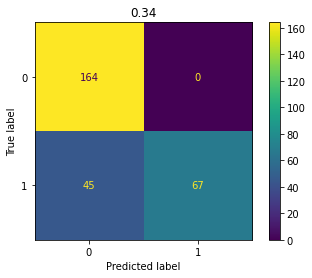

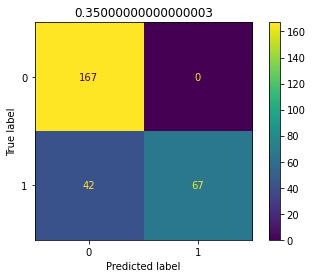

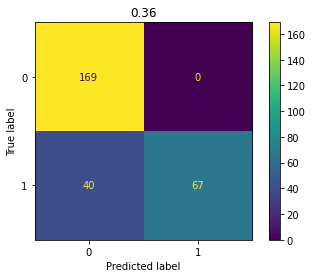

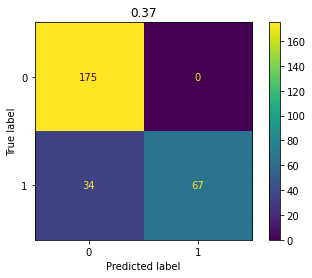

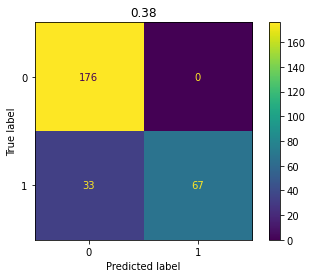

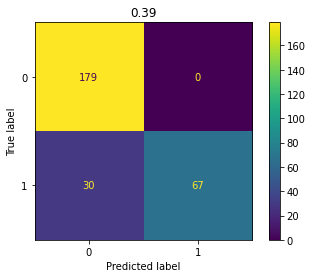

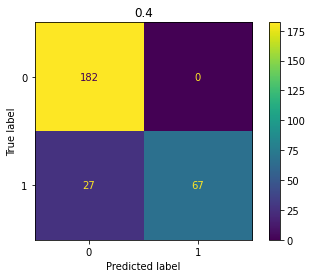

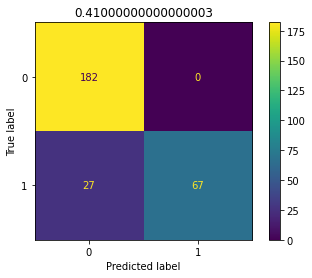

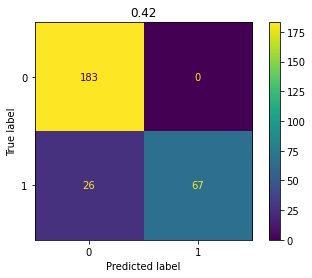

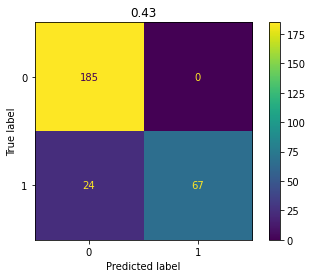

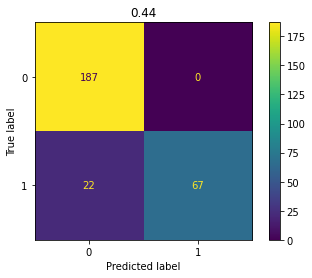

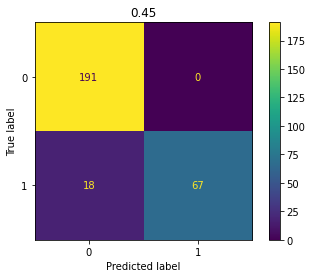

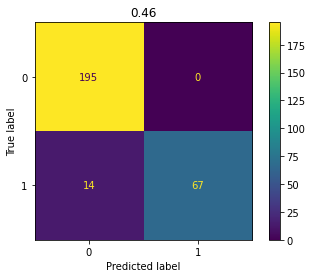

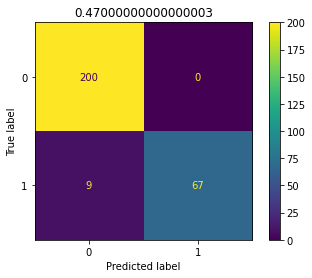

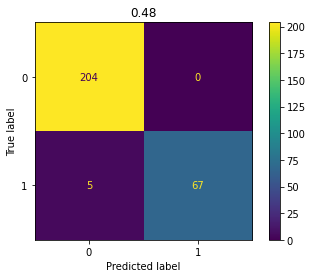

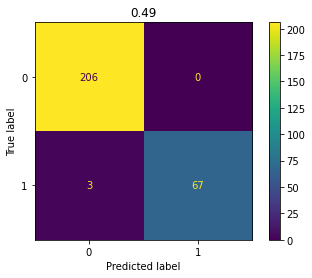

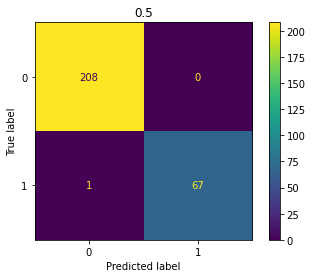

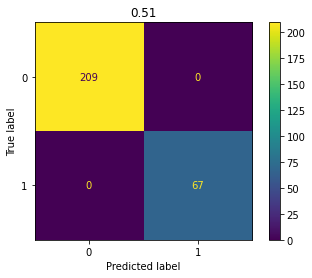

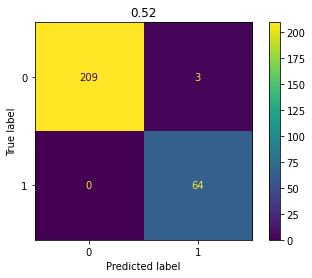

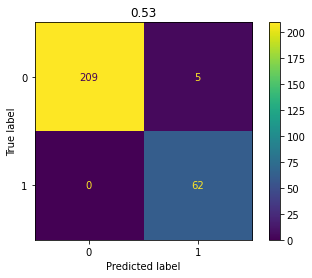

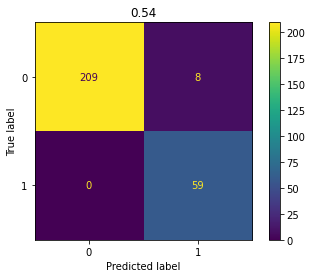

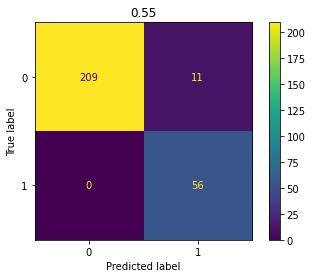

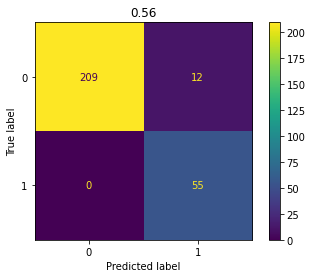

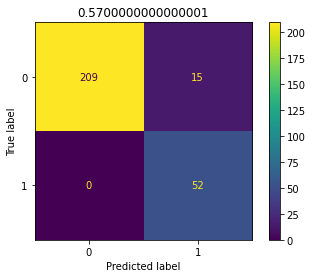

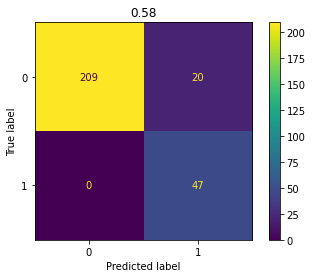

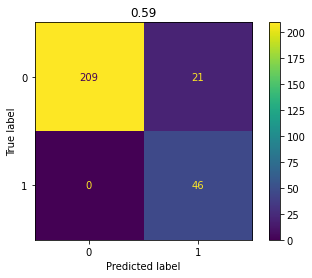

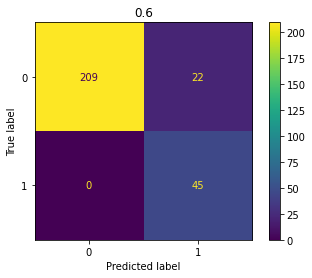

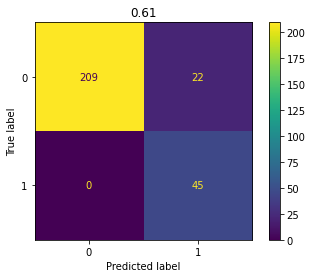

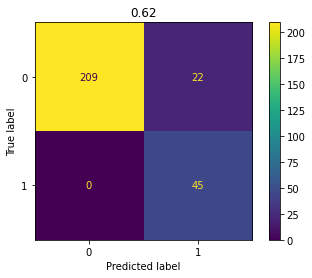

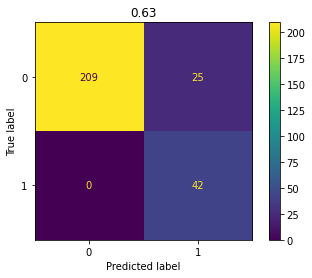

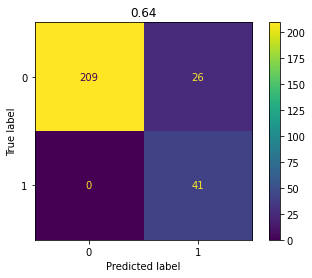

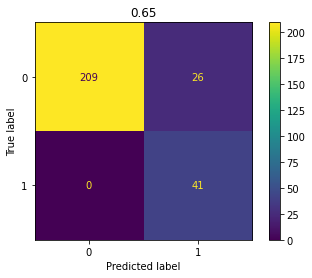

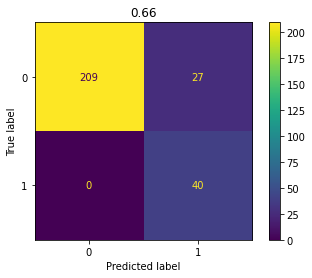

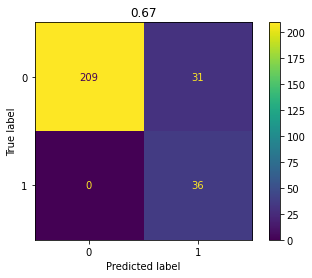

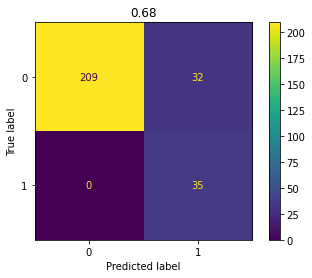

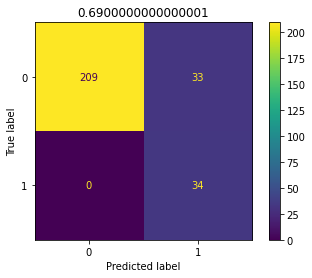

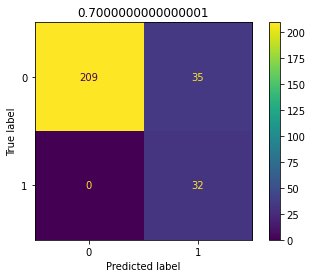

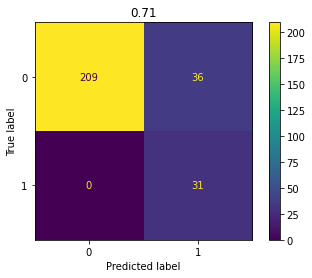

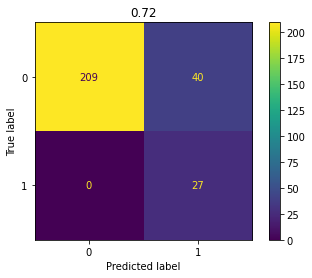

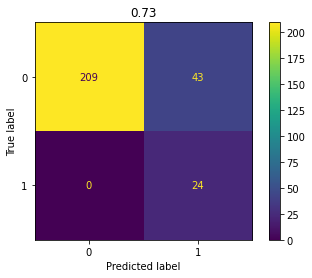

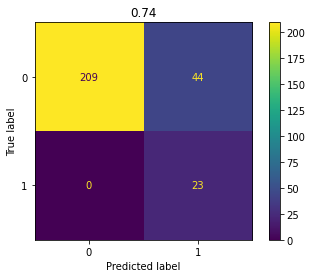

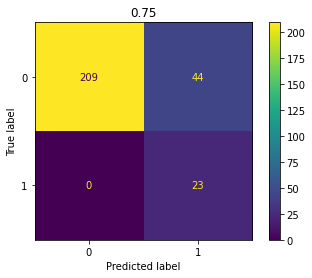

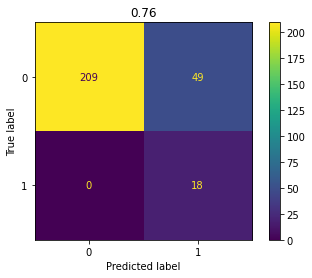

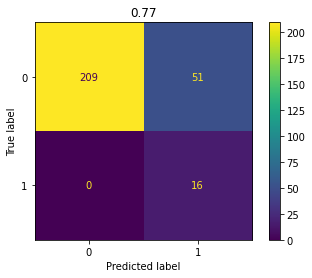

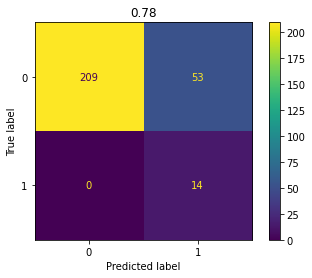

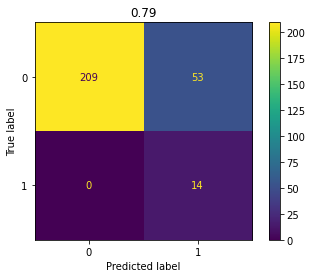

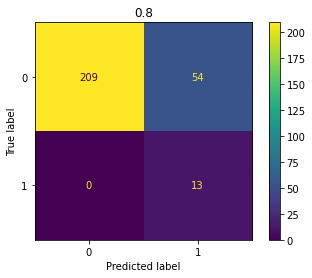

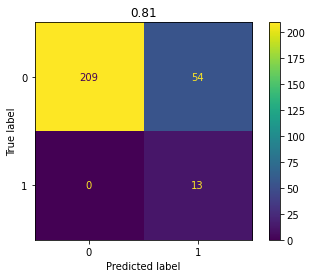

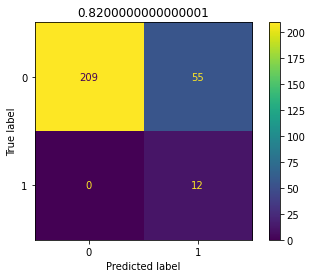

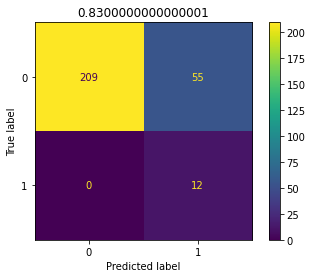

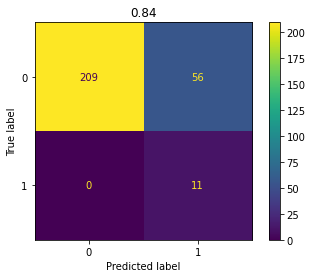

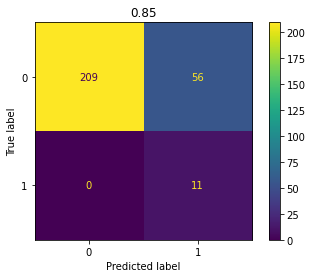

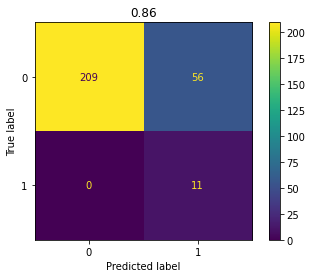

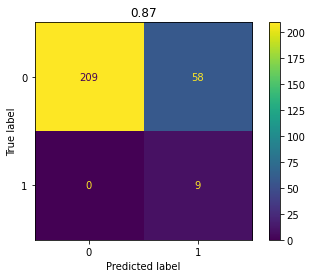

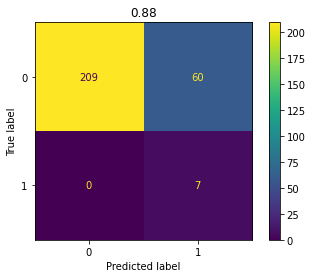

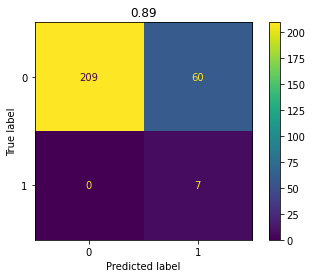

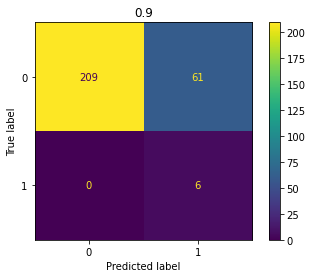

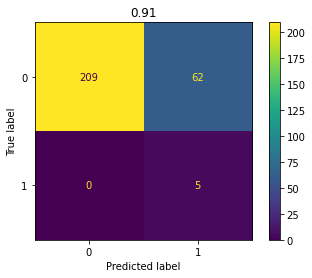

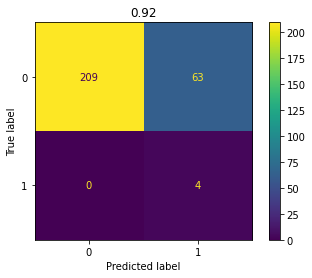

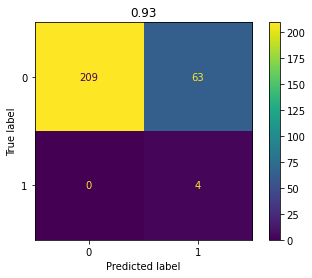

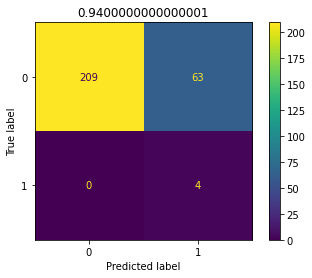

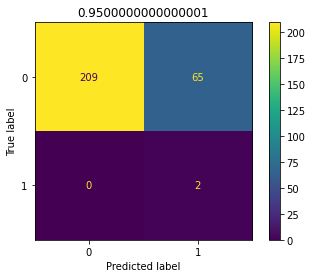

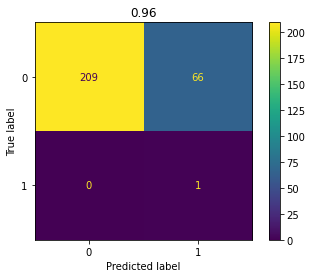

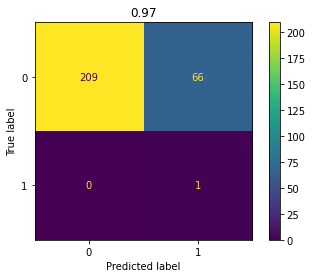

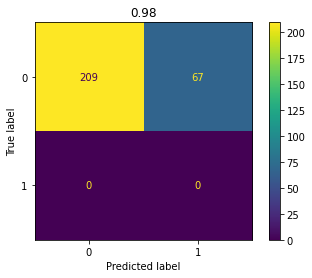

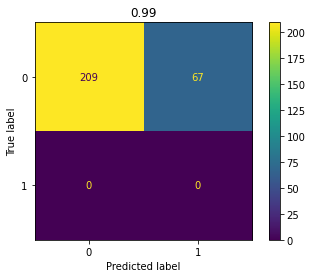

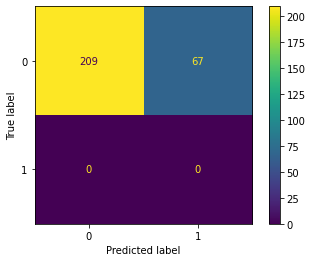

In [44]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = best_clf.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    plt.title(threshold)
    plot_confusion_matrix(best_clf.best_estimator_ , X_val, predicted)


# SVM

In [37]:
cls = svm.SVC(probability=True,random_state=0)

In [38]:
cls.fit(X_train_smote, y_train_smote)

SVC(probability=True, random_state=0)

In [39]:
y_pred = cls.predict(X_val)

In [40]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       228
           1       0.45      0.63      0.53        30

    accuracy                           0.87       258
   macro avg       0.70      0.77      0.73       258
weighted avg       0.89      0.87      0.88       258



In [41]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = cls.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    print(threshold, classification_report(y_val, predicted))

0.0               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.16      1.00      0.28        42

    accuracy                           0.16       258
   macro avg       0.08      0.50      0.14       258
weighted avg       0.03      0.16      0.05       258

0.01               precision    recall  f1-score   support

           0       0.95      0.19      0.32       216
           1       0.19      0.95      0.31        42

    accuracy                           0.31       258
   macro avg       0.57      0.57      0.31       258
weighted avg       0.83      0.31      0.32       258

0.02               precision    recall  f1-score   support

           0       0.96      0.32      0.48       216
           1       0.21      0.93      0.34        42

    accuracy                           0.42       258
   macro avg       0.58      0.63      0.41       258
weighted avg       0.84      0.42      0.46       258

0.03 

0.32               precision    recall  f1-score   support

           0       0.92      0.86      0.89       216
           1       0.46      0.62      0.53        42

    accuracy                           0.82       258
   macro avg       0.69      0.74      0.71       258
weighted avg       0.85      0.82      0.83       258

0.33               precision    recall  f1-score   support

           0       0.92      0.87      0.90       216
           1       0.48      0.62      0.54        42

    accuracy                           0.83       258
   macro avg       0.70      0.74      0.72       258
weighted avg       0.85      0.83      0.84       258

0.34               precision    recall  f1-score   support

           0       0.91      0.88      0.90       216
           1       0.48      0.57      0.52        42

    accuracy                           0.83       258
   macro avg       0.70      0.73      0.71       258
weighted avg       0.84      0.83      0.84       258

0.35


0.5700000000000001               precision    recall  f1-score   support

           0       0.89      0.95      0.92       216
           1       0.63      0.40      0.49        42

    accuracy                           0.86       258
   macro avg       0.76      0.68      0.71       258
weighted avg       0.85      0.86      0.85       258

0.58               precision    recall  f1-score   support

           0       0.89      0.95      0.92       216
           1       0.63      0.40      0.49        42

    accuracy                           0.86       258
   macro avg       0.76      0.68      0.71       258
weighted avg       0.85      0.86      0.85       258

0.59               precision    recall  f1-score   support

           0       0.89      0.96      0.92       216
           1       0.65      0.40      0.50        42

    accuracy                           0.87       258
   macro avg       0.77      0.68      0.71       258
weighted avg       0.85      0.87      0.86 

0.8200000000000001               precision    recall  f1-score   support

           0       0.86      0.98      0.91       216
           1       0.58      0.17      0.26        42

    accuracy                           0.84       258
   macro avg       0.72      0.57      0.59       258
weighted avg       0.81      0.84      0.81       258

0.8300000000000001               precision    recall  f1-score   support

           0       0.86      0.98      0.92       216
           1       0.64      0.17      0.26        42

    accuracy                           0.85       258
   macro avg       0.75      0.57      0.59       258
weighted avg       0.82      0.85      0.81       258

0.84               precision    recall  f1-score   support

           0       0.85      0.98      0.91       216
           1       0.56      0.12      0.20        42

    accuracy                           0.84       258
   macro avg       0.70      0.55      0.55       258
weighted avg       0.80      0.

In [42]:
svmparams = {'kernel':('linear','poly','rbf','sigmoid'),
            'C':[1,52,10],
            'degree':[3,8],
            'coef0':[0.001,10,0.5],
            'gamma':('auto','scale')}

In [43]:
gridsvm=GridSearchCV(cls, svmparams, cv=5, verbose=1)
gridsvm.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  7.8min finished


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [1, 52, 10], 'coef0': [0.001, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             verbose=1)

In [44]:
gridsvm.best_params_

{'C': 52, 'coef0': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}

In [45]:
y_svmpred = gridsvm.best_estimator_.predict(X_val)

In [46]:
print(classification_report(y_svmpred, y_val))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       233
           1       0.40      0.68      0.51        25

    accuracy                           0.87       258
   macro avg       0.68      0.79      0.72       258
weighted avg       0.91      0.87      0.89       258



In [47]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = gridsvm.best_estimator_.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    accuracy = accuracy_score(y_val, y_svmpred)
    print(threshold, classification_report(y_val, y_svmpred))

0.0               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.01               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.02               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.03 

0.34               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.35000000000000003               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.36               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86 

0.6               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.61               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.62               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.63 

# plotting ROC and comparing AUC

In [48]:
logistic_fpr, logistic_tpr, threshold1 = roc_curve(y_val, y_predlog)
auc_logistic = auc(logistic_fpr, logistic_tpr)

logistic_fpr2, logistic_tpr2, threshold12 = roc_curve(y_val, y_pred2)
auc_logistic2 = auc(logistic_fpr2, logistic_tpr2)


svm_fpr, svm_tpr, threshold2 = roc_curve(y_val, y_svmpred)
auc_svm = auc(svm_fpr, svm_tpr)

svm_fpr2, svm_tpr2, threshold22 = roc_curve(y_val, y_pred)
auc_svm2 = auc(svm_fpr2, svm_tpr2)

randfor_fpr, randfor_tpr, threshold3 = roc_curve(y_val, y_predrandf)
auc_randfor = auc(randfor_fpr, randfor_tpr)

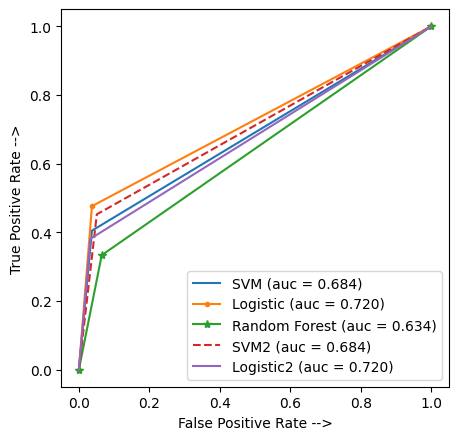

In [49]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(randfor_fpr, randfor_tpr, marker='*', label='Random Forest (auc = %0.3f)' % auc_randfor)
plt.plot(svm_fpr2, svm_tpr2, linestyle='--', label='SVM2 (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr2, logistic_tpr2, marker='', label='Logistic2 (auc = %0.3f)' % auc_logistic)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [50]:
threshold1

array([2, 1, 0])

In [51]:
optimal_idx = np.argmax(logistic_tpr - logistic_fpr)
optimal_threshold = threshold1[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 1


In [52]:
logistic_tpr

array([0.        , 0.47619048, 1.        ])

In [53]:
logistic_fpr

array([0.        , 0.03703704, 1.        ])

In [54]:
logistic_tpr - logistic_fpr

array([0.        , 0.43915344, 0.        ])

In [55]:
optimal_idx

1

In [58]:
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(lgmodel,
                                                     X_val, y_val, 
                                                     cv=5,
                                                     method = 'predict_proba').T

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_probas_1)
df_recall = pd.DataFrame({"recall" : recall[:-1],
                          "threshold" : thresholds})

threshold = df_recall[df_recall['recall'] >= 0.80]['threshold']
threshold

0      0.000012
1      0.000096
2      0.000250
3      0.000359
4      0.000393
         ...   
140    0.085523
141    0.085753
142    0.088981
143    0.091333
144    0.091865
Name: threshold, Length: 145, dtype: float64

In [59]:
df_recall

,recall,threshold
0,1.000000,0.000012
1,0.976190,0.000096
2,0.976190,0.000250
3,0.976190,0.000359
4,0.976190,0.000393
...,...,...
253,0.119048,0.841408
254,0.095238,0.845611
255,0.071429,0.915442
256,0.047619,0.943117


# adaboost classifier

In [60]:
>>> from sklearn.ensemble import AdaBoostClassifier

modelabc = AdaBoostClassifier(n_estimators=100, random_state=0)
sacc = cross_val_score(modelabc, X_train, y_train, scoring='accuracy')
sf1 = cross_val_score(modelabc, X_train, y_train, scoring='f1')
sre = cross_val_score(modelabc, X_train, y_train, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.8391872643485547
f1:  0.41993355481727573
recall:  0.36


In [61]:
modelabc = AdaBoostClassifier(n_estimators=100, random_state=0)
sacc = cross_val_score(modelabc, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(modelabc, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(modelabc, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.8593157941995152
f1:  0.7960125704334312
recall:  0.81551580202743


In [62]:
modelabc.fit(X_train_smote,y_train_smote)
y_predabc = modelabc.predict(X_val)
print(classification_report(y_val, y_predabc))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258



# Gradient Boost

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

modelgbc = AdaBoostClassifier(n_estimators=100, random_state=0)
sacc = cross_val_score(modelgbc, X_train, y_train, scoring='accuracy')
sf1 = cross_val_score(modelgbc, X_train, y_train, scoring='f1')
sre = cross_val_score(modelgbc, X_train, y_train, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.8391872643485547
f1:  0.41993355481727573
recall:  0.36


In [69]:
from sklearn.ensemble import GradientBoostingClassifier

modelgbc = AdaBoostClassifier(n_estimators=100, random_state=0)
sacc = cross_val_score(modelgbc, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(modelgbc, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(modelgbc, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.8593157941995152
f1:  0.7960125704334312
recall:  0.81551580202743


In [70]:
modelgbc.fit(X_train_smote,y_train_smote)
y_predgbc = modelgbc.predict(X_val)


classification_report(y_val, y_predgbc)

'              precision    recall  f1-score   support\n\n           0       0.91      0.93      0.92       216\n           1       0.59      0.55      0.57        42\n\n    accuracy                           0.86       258\n   macro avg       0.75      0.74      0.74       258\nweighted avg       0.86      0.86      0.86       258\n'

In [71]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = modelgbc.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    print(threshold, classification_report(y_val, y_predgbc))

0.0               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.01               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.02               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.03 

0.29               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.3               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.31               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.32 

0.58               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.59               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.6               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.61 

0.87               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.88               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.89               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.59      0.55      0.57        42

    accuracy                           0.86       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.86      0.86      0.86       258

0.9 

# XGB BOOST

In [72]:
from xgboost import XGBClassifier

In [73]:
modelxbc = XGBClassifier(n_estimators=100, random_state=0)
sacc = cross_val_score(modelxbc, X_train, y_train, scoring='accuracy')
sf1 = cross_val_score(modelxbc, X_train, y_train, scoring='f1')
sre = cross_val_score(modelxbc, X_train, y_train, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.8612065354000837
f1:  0.42812187990300954
recall:  0.32


In [79]:
modelxgb = XGBClassifier(n_estimators=100, random_state=0)
sacc = cross_val_score(modelxgb, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(modelxgb, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(modelxgb, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

NameError: name 'XGBClassifier' is not defined

In [80]:
modelxgb.fit(X_train_smote, y_train_smote)

NameError: name 'modelxgb' is not defined

In [75]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = modelxgb.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    print(threshold, classification_report(y_val, y_predxgb))

XGBoostError: need to call fit or load_model beforehand

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
gridsearchXGB = GridSearchCV(xgb, params, verbose=1)

In [ ]:
gridsearchXGB.fit(X_train_smote, y_train_smote)

In [ ]:
y_predXGB= gridsearchXGB.best_estimator_.predict(X_val)

In [ ]:
print(classification_report(y_val, y_predXGB))

# LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
modelLGBM = LGBMClassifier(n_estimators=100, random_state=0)
sacc = cross_val_score(modelLGBM, X_train, y_train, scoring='accuracy')
sf1 = cross_val_score(modelLGBM, X_train, y_train, scoring='f1')
sre = cross_val_score(modelLGBM, X_train, y_train, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

In [ ]:
modelLGBM = LGBMClassifier(n_estimators=100, random_state=0)
sacc = cross_val_score(modelLGBM, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(modelLGBM, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(modelLGBM, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

In [ ]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = modelxgb.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    print(threshold, classification_report(y_val, y_predxgb))

# Logistic Regressions 1.1 - 
## Tentando afinar com Threshold 0.28

In [ ]:
lgmodel = LogisticRegression(random_state=0)
lgmodel.fit(X_train_smote, y_train_smote)

In [ ]:
predicted_proba = lgmodel.predict_proba(X_val)
predicted = (predicted_proba [:,1] >= .28).astype('int')

In [ ]:
print(classification_report(y_val, predicted))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(lgmodel,X_train_smote, y_train_smote)

In [ ]:
plot_confusion_matrix(lgmodel,X_val, y_val)

In [ ]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = cls.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    #print(threshold, '\n ===========================================')
    plt.title(threshold)
    plot_confusion_matrix(lgmodel, X_val, predicted)
    

# Neural Network

In [127]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(50, activation='relu')) # What is the size of the input data?
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers

adam_opt = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

model.compile(loss='rmsprop', 
              optimizer=adam_opt)

model.fit(X_train_smote, y_train_smote,
          batch_size=32,
          epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



ValueError: in user code:

    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:187 __call__
        self.build(y_pred)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:140 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/util/nest.py:635 map_structure
        structure[0], [func(*x) for x in entries],
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/util/nest.py:635 <listcomp>
        structure[0], [func(*x) for x in entries],
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:263 _get_loss_object
        loss = losses_mod.get(loss)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1895 get
        return deserialize(identifier)
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1854 deserialize
        printable_module_name='loss function')
    /Users/pedromesquita/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown loss function: rmsprop


In [110]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 50)                2500      
_________________________________________________________________
dense_56 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_57 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_58 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 11        
Total params: 4,696
Trainable params: 4,696
Non-trainable params: 0
_________________________________________________________________


In [125]:
y_pred = model.predict(X_val)

In [126]:
print(classification_report(y_pred.round(), y_val))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       219
         1.0       0.45      0.49      0.47        39

    accuracy                           0.83       258
   macro avg       0.68      0.69      0.69       258
weighted avg       0.84      0.83      0.84       258



In [101]:
X_train_smote.shape

(1292, 49)